In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Task 1 — Visualize Intensity & Histograms

(np.float64(-0.5), np.float64(499.5), np.float64(499.5), np.float64(-0.5))

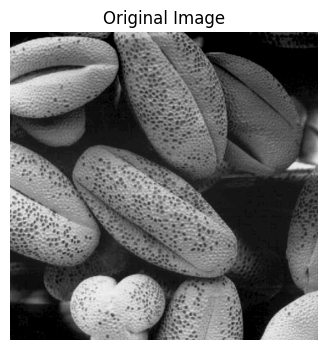

In [2]:
img = cv2.imread("dark.tif", 0)

plt.figure(figsize=(4,4))
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

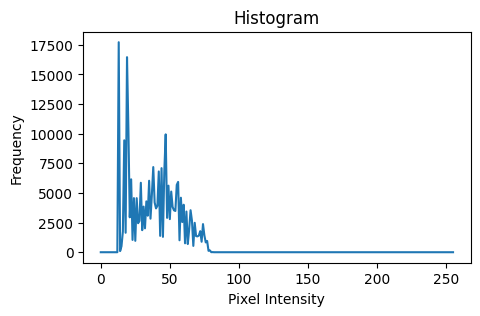

In [4]:
#Histogram Visualization

hist = cv2.calcHist([img], [0], None, [256], [0,256])

plt.figure(figsize=(5,3))
plt.plot(hist)
plt.title("Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

The histogram of the dark image is concentrated towards lower intensity values,
indicating poor illumination. Histogram shape directly reflects lighting conditions.

(np.float64(-0.5), np.float64(499.5), np.float64(499.5), np.float64(-0.5))

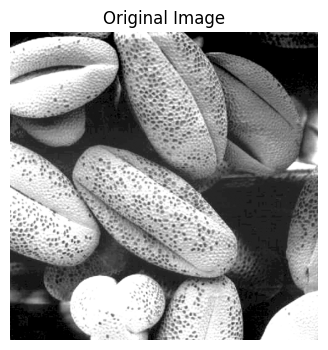

In [5]:
img = cv2.imread("bright.tif", 0)

plt.figure(figsize=(4,4))
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

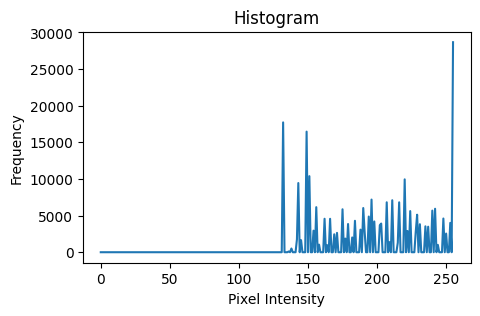

In [6]:
#Histogram Visualization

hist = cv2.calcHist([img], [0], None, [256], [0,256])

plt.figure(figsize=(5,3))
plt.plot(hist)
plt.title("Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

The histogram of the bright image is concentrated towards higher intensity values,
indicating strong illumination. This shift to the right shows that most pixels are
highly illuminated, and some areas may be overexposed.

(np.float64(-0.5), np.float64(499.5), np.float64(499.5), np.float64(-0.5))

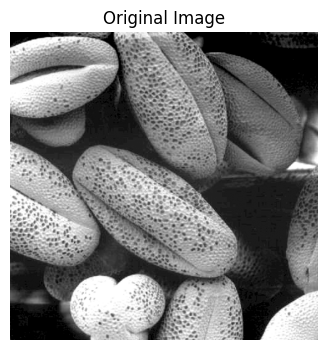

In [7]:
img = cv2.imread("high_contrast.tif", 0)

plt.figure(figsize=(4,4))
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

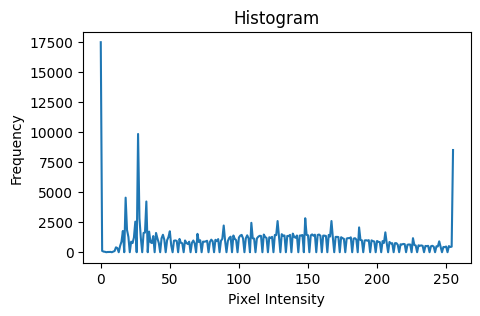

In [8]:
#Histogram Visualization

hist = cv2.calcHist([img], [0], None, [256], [0,256])

plt.figure(figsize=(5,3))
plt.plot(hist)
plt.title("Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

The histogram of the high contrast image is widely spread across the full intensity
range. Pixel values occupy both low and high intensity regions, indicating strong
separation between dark and bright areas. This wide distribution reflects high
contrast in the scene.

(np.float64(-0.5), np.float64(499.5), np.float64(499.5), np.float64(-0.5))

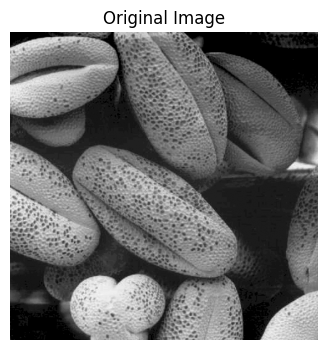

In [9]:
img = cv2.imread("low_contrast.tif", 0)

plt.figure(figsize=(4,4))
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

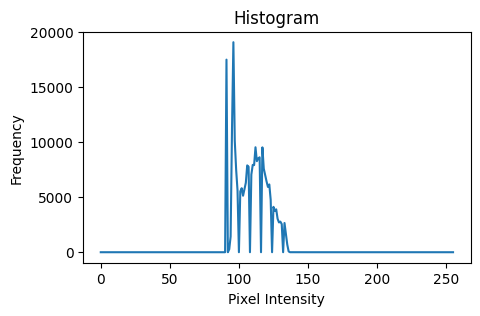

In [10]:
#Histogram Visualization

hist = cv2.calcHist([img], [0], None, [256], [0,256])

plt.figure(figsize=(5,3))
plt.plot(hist)
plt.title("Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

The histogram of the low contrast image is narrowly concentrated within a small
intensity range. Most pixel values are clustered together, indicating poor contrast
and difficulty in visually distinguishing objects from the background.

In [11]:
image_files = [
    "bright.tif",
    "dark.tif",
    "high_contrast.tif",
    "low_contrast.tif"
]

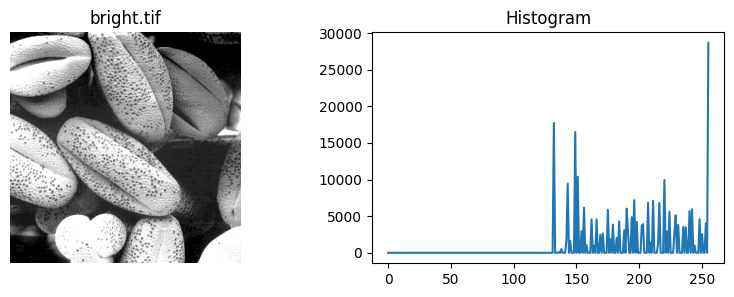

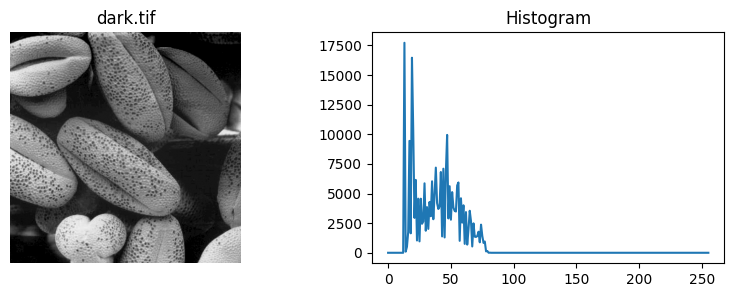

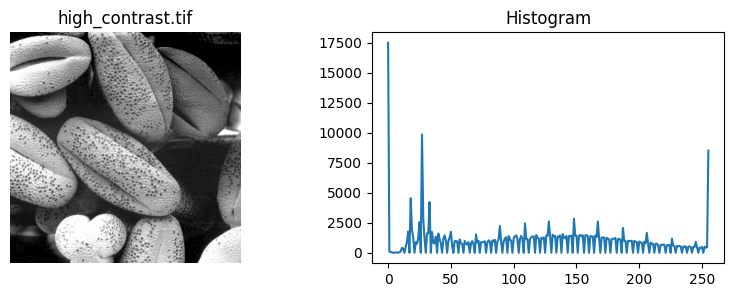

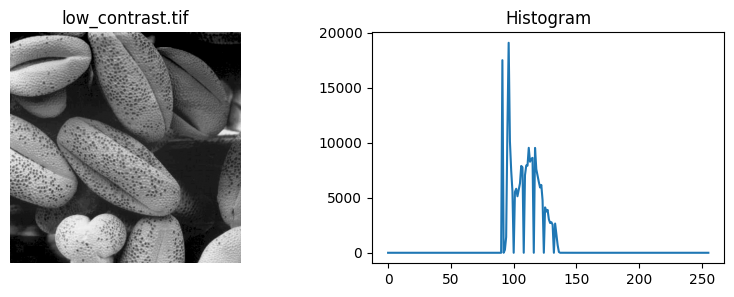

In [12]:
for name in image_files:
    img = cv2.imread(name, 0)

    plt.figure(figsize=(10,3))

    plt.subplot(1,2,1)
    plt.imshow(img, cmap='gray')
    plt.title(name)
    plt.axis('off')

    plt.subplot(1,2,2)
    hist = cv2.calcHist([img],[0],None,[256],[0,256])
    plt.plot(hist)
    plt.title("Histogram")

    plt.show()

**If two images have similar histograms, can they still look visually different? Why?**

Yes. Two images can have similar histograms but appear visually different because
histograms only represent the distribution of pixel intensities and do not capture
spatial arrangement. The same intensity values can be arranged differently in space,
leading to different visual appearances.

# Task 2 — Manual Threshold & Observe Failure Cases

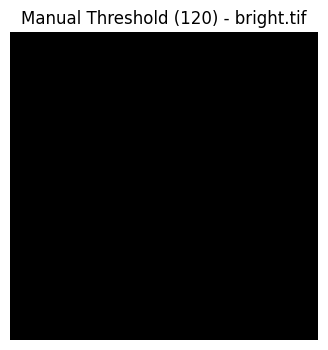

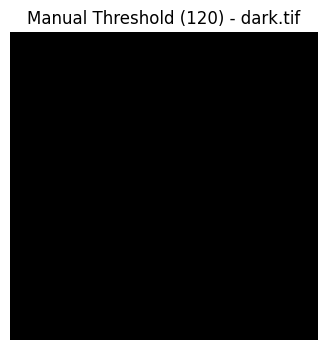

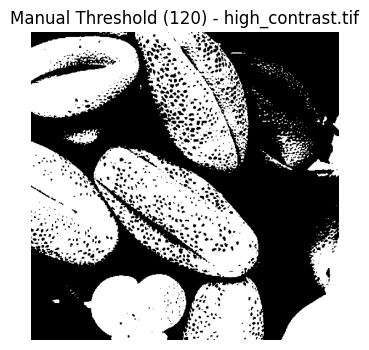

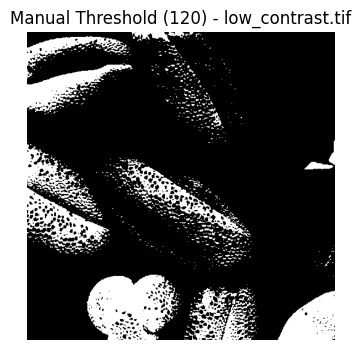

In [13]:
for name in image_files:
    img = cv2.imread(name, 0)

    _, th = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY)

    plt.figure(figsize=(4,4))
    plt.imshow(th, cmap='gray')
    plt.title(f"Manual Threshold (120) - {name}")
    plt.axis('off')
    plt.show()

Manual thresholding performs well for high contrast images but fails for bright, dark,
and low contrast images due to overlapping foreground and background intensities.
A single fixed threshold cannot handle varying illumination conditions.

**Is thresholding really “deciding” what an object is, or just comparing brightness?**

Thresholding does not understand or identify objects. It simply compares pixel
intensity values against a chosen threshold. As a result, it cannot distinguish
objects based on shape, meaning, or context.

# Task 3 — Apply Otsu & Adaptive Thresholding

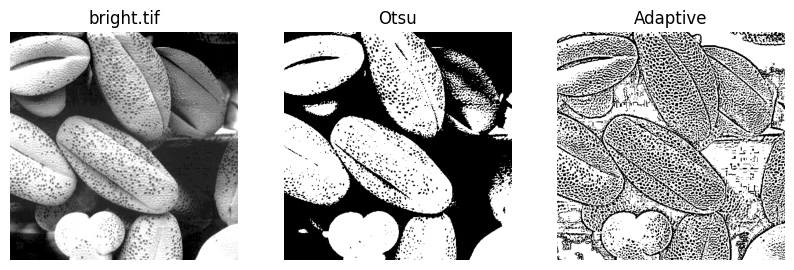

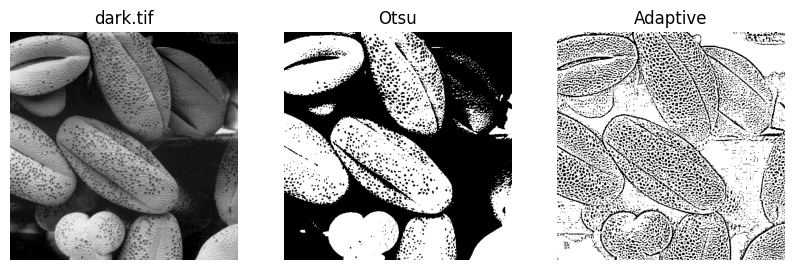

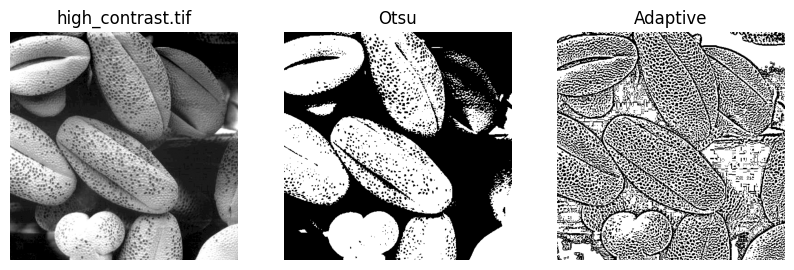

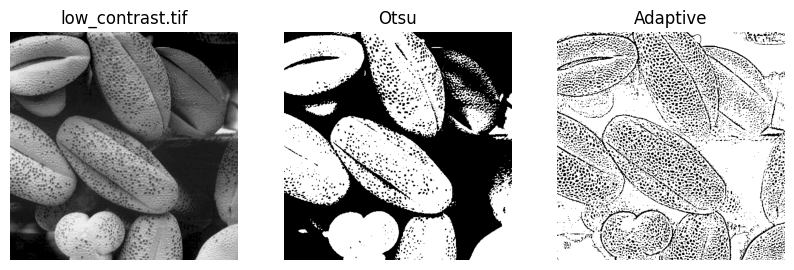

In [14]:
for name in image_files:
    img = cv2.imread(name, 0)

    _, otsu = cv2.threshold(
        img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    adaptive = cv2.adaptiveThreshold(
        img, 255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY, 11, 2)

    plt.figure(figsize=(10,3))

    plt.subplot(1,3,1)
    plt.imshow(img, cmap='gray')
    plt.title(name)
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.imshow(otsu, cmap='gray')
    plt.title("Otsu")
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.imshow(adaptive, cmap='gray')
    plt.title("Adaptive")
    plt.axis('off')

    plt.show()

Otsu thresholding works well when histogram peaks are separable, such as in high
contrast images. Adaptive thresholding performs best overall, especially for images
with uneven illumination.

**Why can adaptive thresholding still struggle on textured backgrounds?**

Adaptive thresholding computes local thresholds based on neighborhood intensity
variations. In highly textured backgrounds, intensity fluctuations can be similar to
foreground patterns, leading to incorrect segmentation.

# Task 4 — Gamma & Log Transformations

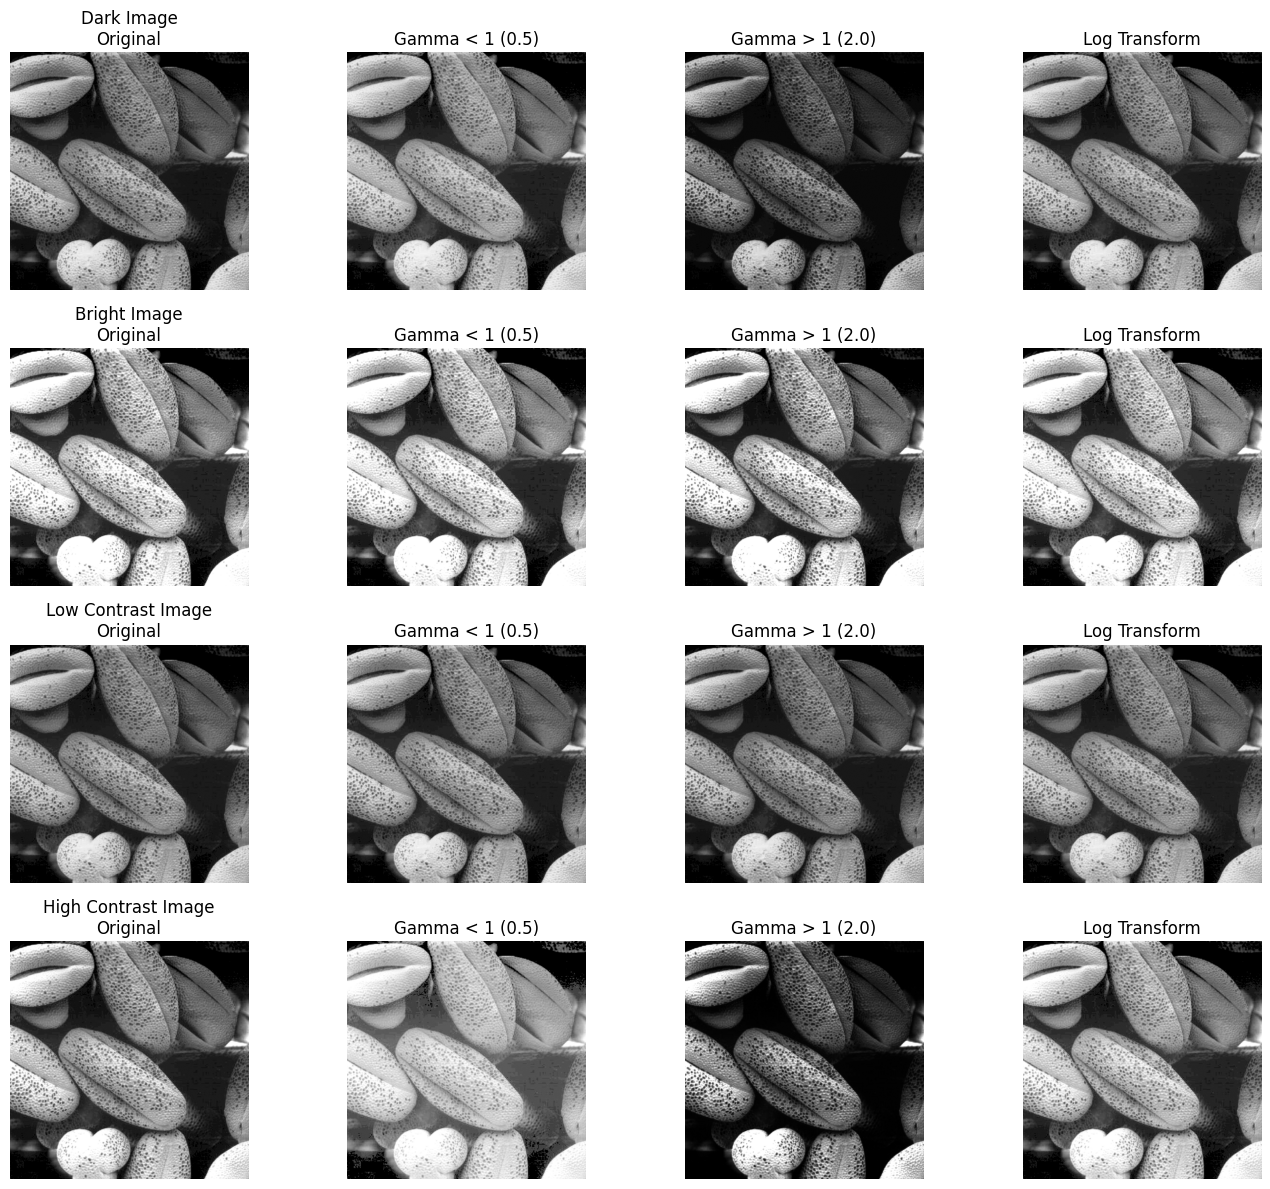

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load all images in a dictionary
images = {
    "Dark Image": cv2.imread("dark.tif", 0),
    "Bright Image": cv2.imread("bright.tif", 0),
    "Low Contrast Image": cv2.imread("low_contrast.tif", 0),
    "High Contrast Image": cv2.imread("high_contrast.tif", 0)
}

# Gamma values
gamma_dark = 0.5    # brighten dark images
gamma_bright = 2.0  # reduce brightness of bright images

# Create figure
plt.figure(figsize=(14, 12))
row = 1

for title, img in images.items():
    # Normalize image to [0,1]
    img_norm = img / 255.0

    # Gamma correction
    gamma_low = np.power(img_norm, gamma_dark)
    gamma_high = np.power(img_norm, gamma_bright)

    # Log transformation
    log_transformed = np.log1p(img_norm)
    log_transformed = log_transformed / log_transformed.max()

    # Convert back to uint8
    gamma_low = np.uint8(gamma_low * 255)
    gamma_high = np.uint8(gamma_high * 255)
    log_transformed = np.uint8(log_transformed * 255)

    # Display results
    plt.subplot(len(images), 4, row)
    plt.imshow(img, cmap='gray')
    plt.title(f"{title}\nOriginal")
    plt.axis('off')

    plt.subplot(len(images), 4, row + 1)
    plt.imshow(gamma_low, cmap='gray')
    plt.title("Gamma < 1 (0.5)")
    plt.axis('off')

    plt.subplot(len(images), 4, row + 2)
    plt.imshow(gamma_high, cmap='gray')
    plt.title("Gamma > 1 (2.0)")
    plt.axis('off')

    plt.subplot(len(images), 4, row + 3)
    plt.imshow(log_transformed, cmap='gray')
    plt.title("Log Transform")
    plt.axis('off')

    row += 4

plt.tight_layout()
plt.show()

Gamma and log transformations were applied to images captured under different illumination conditions to enhance perceptual quality. For dark images, gamma correction with γ < 1 increased the visibility of shadow regions by expanding low-intensity values, effectively simulating increased camera exposure. For bright or over-exposed images, gamma correction with γ > 1 compressed high-intensity values, reducing glare and recovering visual details in saturated regions. The log transformation expanded darker pixel values while compressing brighter ones, producing a subtle contrast enhancement without drastically altering the overall brightness. These transformations do not change the physical identity of objects in the image but modify how intensity values are mapped for better human perception. Gamma correction is most effective when illumination problems are global, while log transformation is useful for gentle enhancement in images with a wide dynamic range.

**Does gamma correction change object identity or only perception?**

Gamma correction only changes the perceived brightness and contrast of the image.
It does not modify object structure or identity, but it can affect how easily objects
are visually distinguished.

# Task 5 — Contrast Stretching & Histogram Equalization

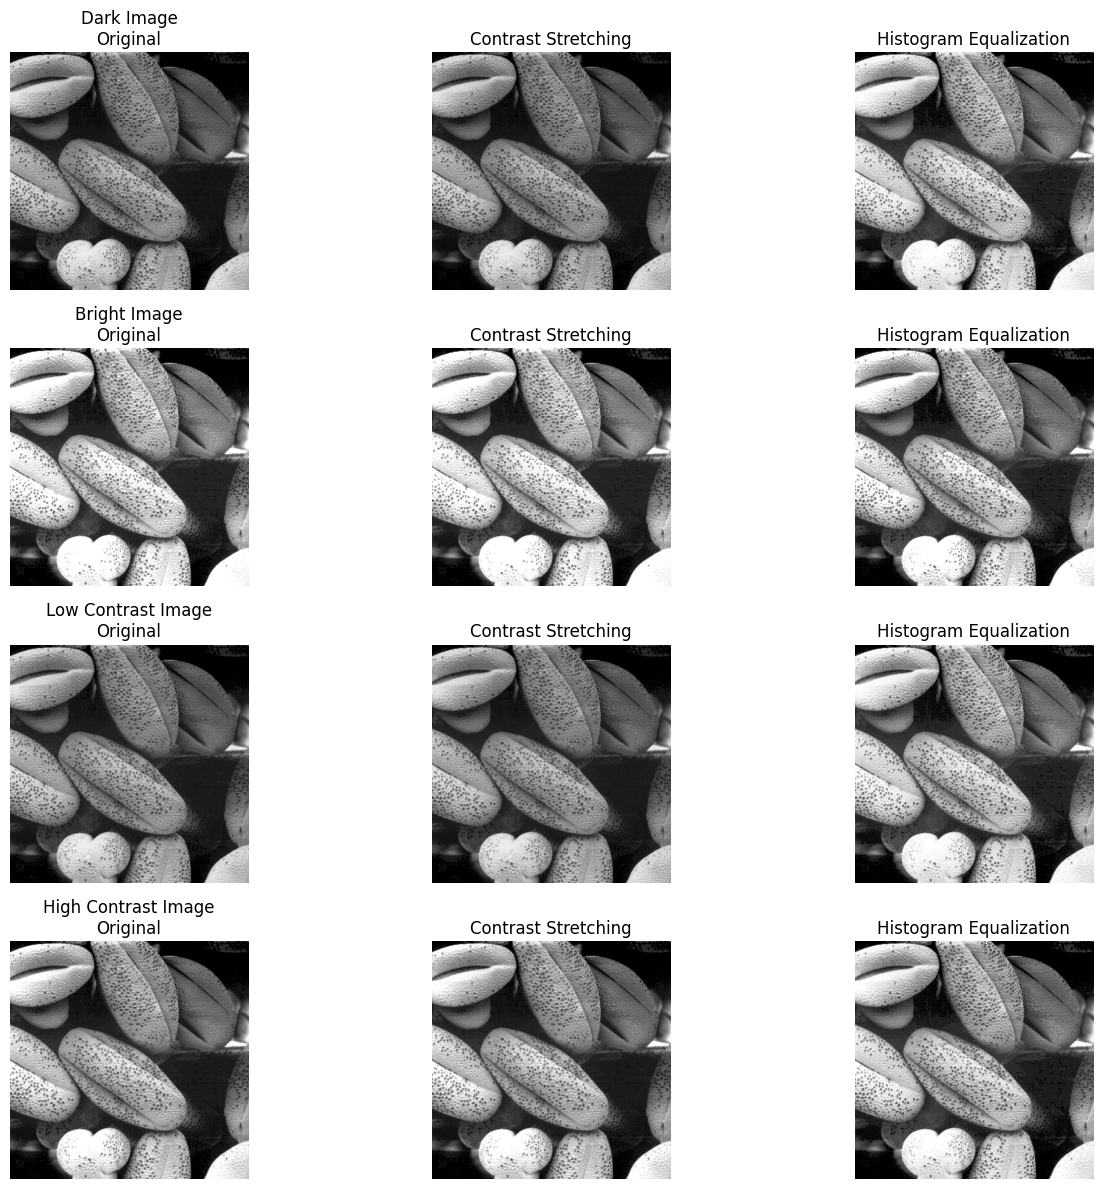

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images
images = {
    "Dark Image": cv2.imread("dark.tif", 0),
    "Bright Image": cv2.imread("bright.tif", 0),
    "Low Contrast Image": cv2.imread("low_contrast.tif", 0),
    "High Contrast Image": cv2.imread("high_contrast.tif", 0)
}

# Function for contrast stretching
def contrast_stretch(img):
    min_val = np.min(img)
    max_val = np.max(img)
    stretched = (img - min_val) * (255 / (max_val - min_val))
    return np.uint8(stretched)

plt.figure(figsize=(14, 12))
row = 1

for title, img in images.items():
    # Apply contrast stretching
    stretched = contrast_stretch(img)

    # Apply histogram equalization
    equalized = cv2.equalizeHist(img)

    # Display results
    plt.subplot(len(images), 3, row)
    plt.imshow(img, cmap='gray')
    plt.title(f"{title}\nOriginal")
    plt.axis('off')

    plt.subplot(len(images), 3, row + 1)
    plt.imshow(stretched, cmap='gray')
    plt.title("Contrast Stretching")
    plt.axis('off')

    plt.subplot(len(images), 3, row + 2)
    plt.imshow(equalized, cmap='gray')
    plt.title("Histogram Equalization")
    plt.axis('off')

    row += 3

plt.tight_layout()
plt.show()

Linear contrast stretching normalizes the pixel intensity range by mapping the minimum and maximum intensity values in the image to the full display range [0,255]. This process preserves the original relative distribution of intensities and improves contrast uniformly across the image. In contrast, histogram equalization redistributes pixel intensities so that they are spread more evenly across the available range, significantly enhancing global contrast. While contrast stretching performs a simple linear adjustment, histogram equalization is a nonlinear transformation that can reveal hidden details but may also over-enhance noise and reduce natural appearance, especially in images with uneven illumination or textured backgrounds.

**When can histogram equalization amplify noise instead of details?**

Histogram equalization can amplify noise when the image contains large uniform
regions or low signal-to-noise ratio. In such cases, small intensity variations caused
by noise are stretched along with useful details.

# Task 6 — Bit-Plane Slicing

(np.float64(-0.5), np.float64(499.5), np.float64(499.5), np.float64(-0.5))

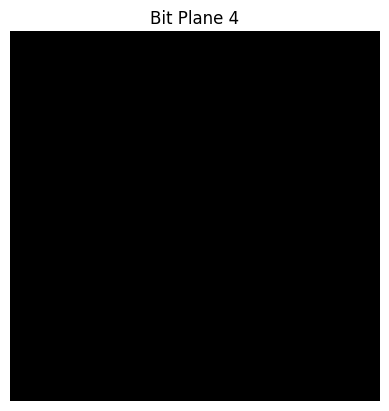

In [17]:
img = cv2.imread("high_contrast.tif", 0)

bit4 = (img & 16) * 16

plt.imshow(bit4, cmap='gray')
plt.title("Bit Plane 4")
plt.axis('off')

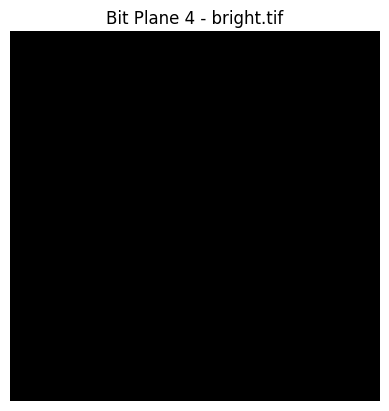

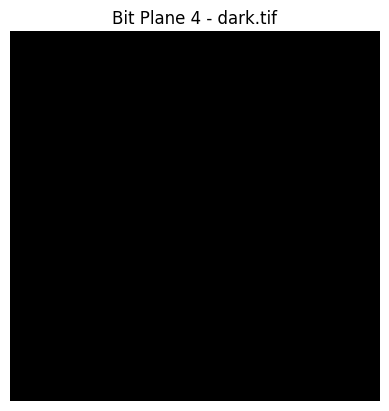

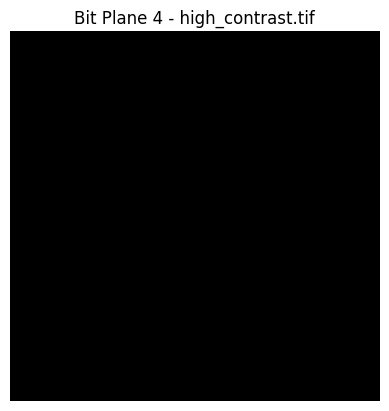

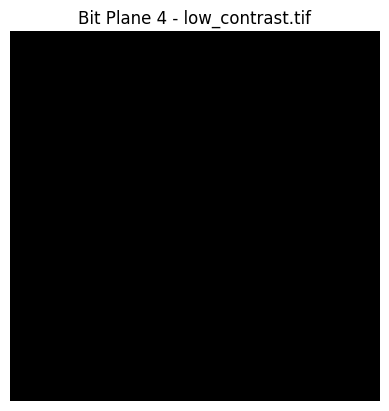

In [18]:
image_files = [
    "bright.tif",
    "dark.tif",
    "high_contrast.tif",
    "low_contrast.tif"
]

for name in image_files:
    img = cv2.imread(name, 0)
    bit4 = (img & 16) * 16

    plt.imshow(bit4, cmap='gray')
    plt.title(f"Bit Plane 4 - {name}")
    plt.axis('off')
    plt.show()

Across all images, higher bit planes consistently retain semantic structure, while
lower bit planes mostly represent noise and texture, regardless of illumination or
contrast.

**Could accessing lower bit-planes ever reveal hidden watermarks or metadata?**

Yes. Lower bit-planes can contain embedded information such as digital watermarks or hidden data. These planes are sometimes used in steganography because changes
in lower bits have minimal impact on visual appearance.



# **Final Reflection**

**In a single paragraph, explain how illumination and histogram shape influence segmentation
and perception. Which transformation felt most powerful, and which seemed risky without
careful use?**

Illumination directly affects histogram distribution and segmentation quality.
High contrast images are easier to segment, while low contrast and unevenly
illuminated images require adaptive techniques. Adaptive thresholding was the
most robust method, while histogram equalization can be risky if noise is present.